Step by Step WordCount Pipeline
---------------------------------


In [23]:
inputRDD  = sc.textFile('spark-data/prince_by_machiavelli.txt')

In [24]:
inputRDD

spark-data/prince_by_machiavelli.txt MapPartitionsRDD[26] at textFile at NativeMethodAccessorImpl.java:-2

In [25]:
inputRDD.take(10)

[u'The Project Gutenberg EBook of The Prince, by Nicolo Machiavelli',
 u'',
 u'This eBook is for the use of anyone anywhere at no cost and with',
 u'almost no restrictions whatsoever.  You may copy it, give it away or',
 u're-use it under the terms of the Project Gutenberg License included',
 u'with this eBook or online at www.gutenberg.org',
 u'',
 u'',
 u'Title: The Prince',
 u'']

In [26]:
inputRDD.count()

5063

In [27]:
wordsRDD = inputRDD.flatMap(lambda s: s.split(' '))

In [28]:
wordsRDD.take(15)

[u'The',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'The',
 u'Prince,',
 u'by',
 u'Nicolo',
 u'Machiavelli',
 u'',
 u'This',
 u'eBook',
 u'is',
 u'for']

In [29]:
nonEmptyWordsRDD = wordsRDD.filter(lambda w:len(w) > 0)
nonEmptyWordsRDD.take(10)

[u'The',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'The',
 u'Prince,',
 u'by',
 u'Nicolo',
 u'Machiavelli']

In [30]:
nonEmptyWordsRDDWithOne = nonEmptyWordsRDD.map(lambda w:(w.lower(),1))
nonEmptyWordsRDDWithOne.take(10)

[(u'the', 1),
 (u'project', 1),
 (u'gutenberg', 1),
 (u'ebook', 1),
 (u'of', 1),
 (u'the', 1),
 (u'prince,', 1),
 (u'by', 1),
 (u'nicolo', 1),
 (u'machiavelli', 1)]

In [31]:
nonEmptyWordsRDDWithCount = nonEmptyWordsRDDWithOne.reduceByKey(lambda a,b: a + b)

In [32]:
nonEmptyWordsRDDWithCount.take(10)

[(u'(francesco)', 1),
 (u'united,', 2),
 (u'pardon', 2),
 (u'donate,', 1),
 (u'dissolution', 2),
 (u'desirable', 2),
 (u'all', 185),
 (u'papacy', 1),
 (u'four', 14),
 (u'church,', 6)]

Populating the interactive namespace from numpy and matplotlib


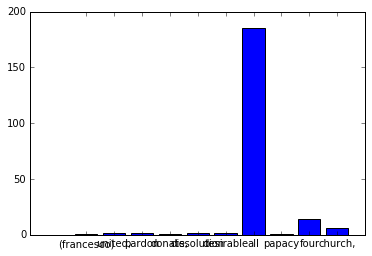

In [33]:
%pylab inline
import matplotlib.pyplot as plt
words, counts = zip(*nonEmptyWordsRDDWithCount.take(10))

plt.bar(range(len(words)), counts, align='center')
plt.xticks(range(len(words)), words)
plt.show()